In [1]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [3]:
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
regressor=DecisionTreeRegressor()

In [6]:
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
regressor.predict(X)

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [8]:
pd.DataFrame(regressor.predict(X),y)

,0
45000,45000.0
50000,50000.0
60000,60000.0
80000,80000.0
110000,110000.0
150000,150000.0
200000,200000.0
300000,300000.0
500000,500000.0
1000000,1000000.0


In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [16]:
regressor.tree_

In [20]:
########## vizualization results

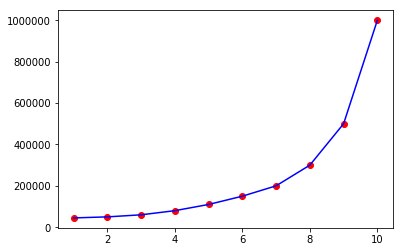

In [22]:
plt.scatter(X,y,color="red")
plt.plot(X,regressor.predict(X),color="blue")

In [31]:
grid=np.arange(X.min(),X.max(),step=0.01)

In [32]:
grid=grid.reshape(len(grid),1)

Text(0.5, 0, 'X values')

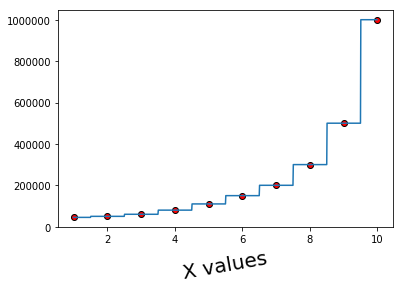

In [44]:
plt.scatter(X,y,color="red",edgecolor="k")
plt.plot(grid,regressor.predict(grid))
plt.xlabel("X values",size=20,rotation=10)

# this is a non continuous regression model. 

 #        2. decsion tree with ada boost 

Automatically created module for IPython interactive environment


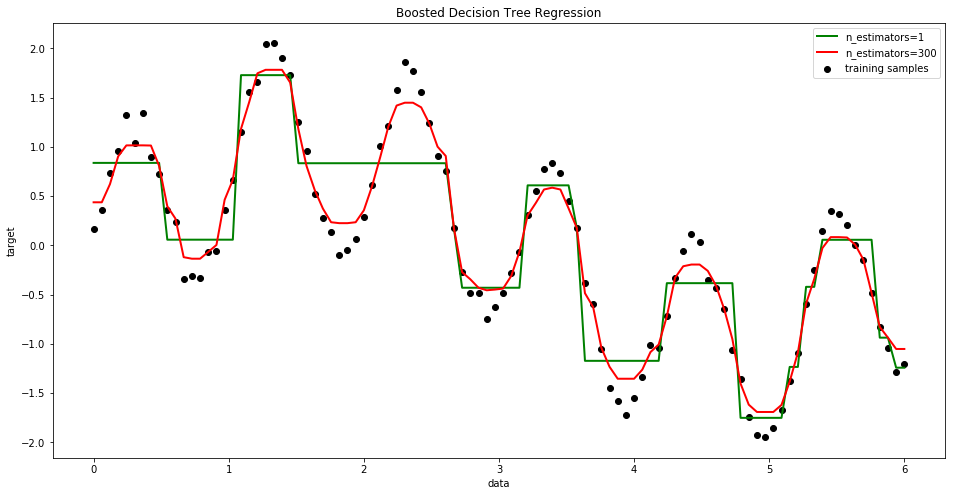

In [62]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng,learning_rate=0.15)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure(figsize=(16,8))
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [63]:
regr_2.score(X,y)



0.9750581617432456

In [88]:
regr_1.score(X,y)

0.7629899797432984

In [89]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor


In [90]:
# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

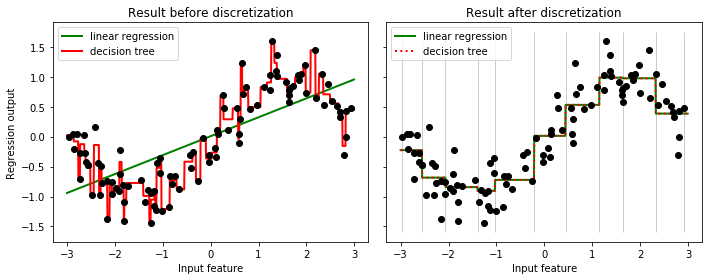

In [100]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

# project

In [260]:
 data=pd.read_csv("C://Users//sandY//Downloads//New folder//New folder//Logistic Regression -  Live Class Codes and datasets-2//MMix.csv")

In [261]:
data.head()

,NewVolSales,Base Price,Radio,TV,InStore,Facebook,Twitter,WebCamp,Online,Website Campaign,Inserts,NewspaperInserts
0,19564,15.029276,245,145.4,15.452,0,0,0,0,NaN,0,NaN
1,19387,15.029276,314,66.0,16.388,0,0,0,0,NaN,0,NaN
2,23889,14.585093,324,155.1,62.692,0,0,0,0,NaN,0,NaN
3,20055,15.332887,298,114.5,16.573,0,0,0,0,NaN,0,NaN
4,20064,15.642632,279,96.5,41.504,0,0,0,0,NaN,0,NaN


In [262]:
data=data.drop(["NewspaperInserts"],axis=1)

In [263]:
data.columns

Index(['NewVolSales', 'Base Price', 'Radio ', 'TV ', 'InStore', 'Facebook',
       'Twitter', 'WebCamp', 'Online', 'Website Campaign ', 'Inserts'],
      dtype='object')

In [264]:
data=data.iloc[:,[0,1,2,3,4,5,6,7,8,10]]

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X=data.iloc[:,1:].values

In [267]:
y=data.iloc[:,0].values

In [314]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [315]:
X_train.shape,y_train.shape

((83, 9), (83,))

In [316]:
dc=DecisionTreeRegressor(criterion="mse",random_state=0,max_depth=6)

In [317]:
dc.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [318]:
dc.predict(X_test)

array([24944.        , 19154.76470588, 22529.71428571, 19950.83333333,
       19017.        , 24944.        , 20891.66666667, 19154.76470588,
       20891.66666667, 20100.05      , 20891.66666667, 19154.76470588,
       20891.66666667, 19154.76470588, 19867.16666667, 20100.05      ,
       19867.16666667, 24944.        , 17785.        , 20891.66666667,
       19950.83333333])

In [319]:
y_test

array([24219, 18828, 23889, 19897, 19558, 23576, 20940, 18335, 23872,
       19953, 21041, 17926, 22466, 18262, 19033, 20538, 21139, 22707,
       19597, 20498, 19980], dtype=int64)

In [320]:
dc.score(X_train,y_train)

0.8640632069954193

In [321]:
dc.score(X_test,y_test)

0.6161555650107866

In [322]:
######## lets try scaling

In [323]:
from sklearn.preprocessing import StandardScaler

In [324]:
sc=StandardScaler()

In [325]:
X_train=sc.fit_transform(X_train)

In [326]:
X_test=sc.transform(X_test)

In [327]:

dc=DecisionTreeRegressor(criterion="mse",random_state=0,max_depth=6)
dc.fit(X_train,y_train)
dc.predict(X_test)

dc.score(X_test,y_test)

0.6161555650107866

In [328]:
dc.score(X_train,y_train)

0.8640632069954193

In [329]:
sc_y=StandardScaler()

In [330]:
y_train=sc.fit_transform(y_train.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [331]:
y_test=sc.transform(y_test.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [332]:
dc.feature_importances_

array([0.67391419, 0.        , 0.11660342, 0.14872299, 0.        ,
       0.        , 0.06075939, 0.        , 0.        ])

In [334]:
X_train=X_train[:,[0,1,2,3,6]]


In [333]:
X_test=X_test[:,[0,1,2,3,6]]

In [342]:
dc1=DecisionTreeRegressor(criterion="mse",random_state=0,max_depth=6,min_samples_split=2,)
dc1.fit(X_train,y_train)
dc1.predict(X_test)

dc1.score(X_test,y_test)

0.6161555650107863

In [345]:
X_train.shape,y_train.shape

((83, 5), (83, 1))

In [348]:
plt.scatter(sc.inverse_transform(X_train)[:,0],sc_y.inverse_transform(y_train))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.